# User/Adress Analysis of ETC Data

In [100]:
from Model import Model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from Prediction import Prediction
from tensorflow.keras.models import load_model
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

In [103]:
userdf  = pd.read_csv('/Volumes/Thesis/BlockchainData/ETC/ETC_UserData_labeled_2018_2020.csv')

cols = ['adress', 'label']
malicoususers = userdf.loc[userdf.label==1]
malicoususers = malicoususers.drop(columns=cols)
normaluser = userdf.loc[userdf.label==0]
normaluser = normaluser.drop(columns=cols)
numfeatures = len(normaluser.columns)
collst = malicoususers.columns

In [72]:
len(userdf)

2333479

In [73]:
list(userdf.label).count(1)

14901

In [104]:
scaler = MinMaxScaler(feature_range=(0, 1))
normaluser = scaler.fit_transform(normaluser)
malicoususers = scaler.fit_transform(malicoususers)

train, valid = train_test_split(normaluser,test_size=0.5, train_size=0.5, random_state=42)
valid, tst = train_test_split(valid,test_size=0.5, train_size=0.5, random_state=42)
label = [0] * tst.shape[0]
label = label +[1] * malicoususers.shape[0]
test = np.concatenate((tst, malicoususers))
print(test.shape)

(594546, 15)


In [75]:
#model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser1003216allfeature4Jun2021011116.h5')#, compile = False)

In [105]:
model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser10012816allfeature8Jun2021225857.h5')

In [ ]:
#model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser10012816allfeature228Jun2021233703.h5')

In [106]:
cols = list(userdf.columns)
cols.remove('adress'); cols.remove('label')
cols

['in_etc',
 'mean_in_etc',
 'cum_gas_used',
 'out_etc',
 'mean_gas',
 'mean_out_etc',
 'indegree',
 'outdegree',
 'avg_num_of_blocks_between_intx',
 'avg_num_of_blocks_between_outtx',
 'median_num_of_blocks_between_outtx',
 'median_num_of_blocks_between_intx',
 'numsenttx',
 'avg_gas_limit',
 'avg_gas_price']

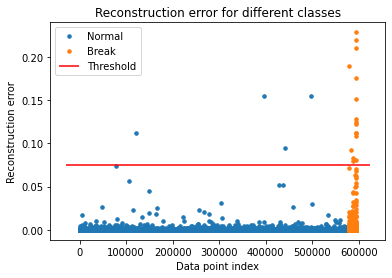

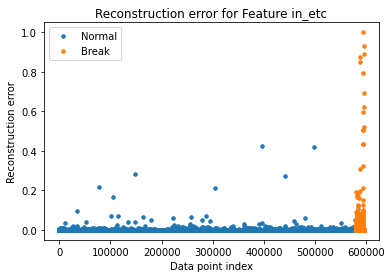

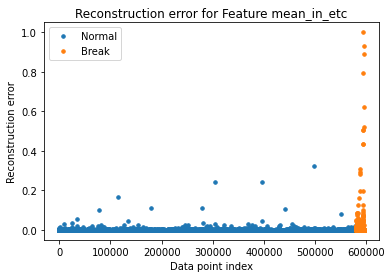

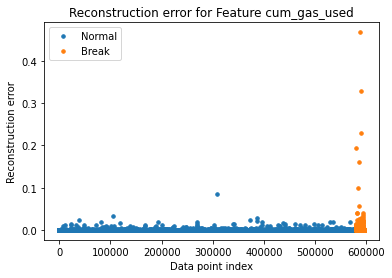

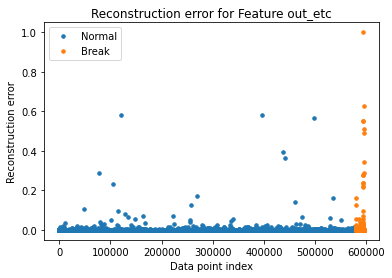

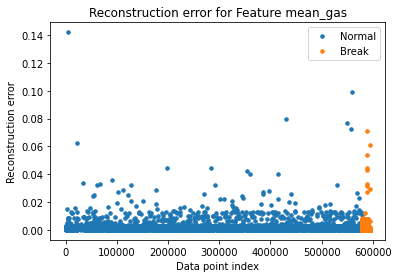

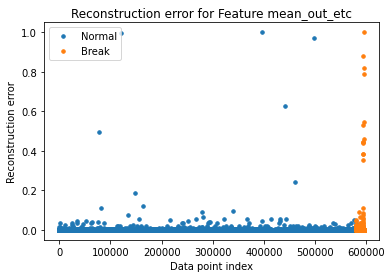

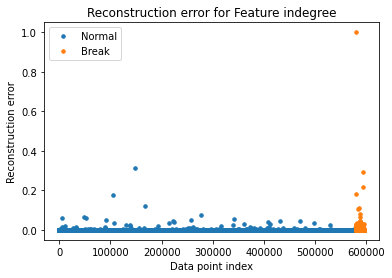

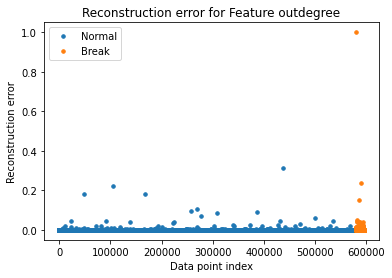

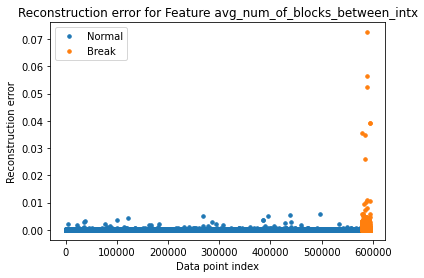

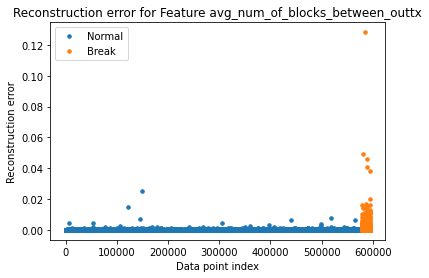

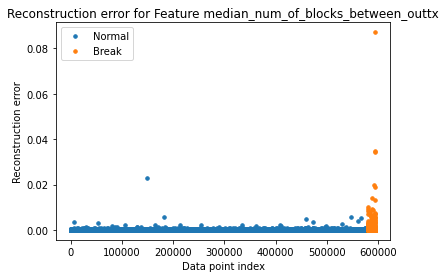

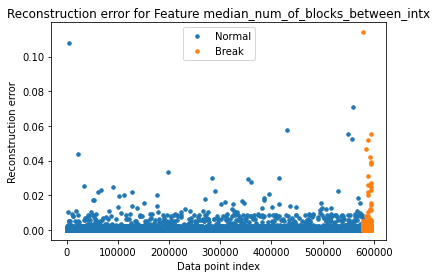

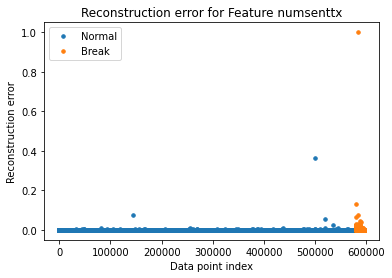

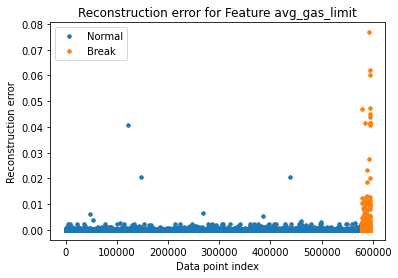

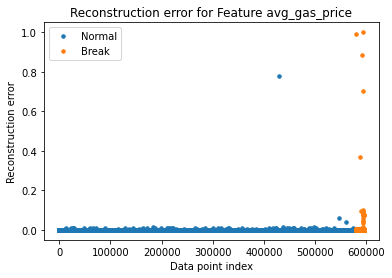

In [107]:
pred = model.predict(test)
mse = np.abs(pred-test)
Pred1 = Prediction(
    model = model,
    test = test
)
Pred1.pred = pred
Pred1.mse = mse
Pred1.mse_avg = mse_avg

Pred1.plot_avg_reconstruction_error(label, 0.075)
Pred1.plot_error_all_features(cols, label)

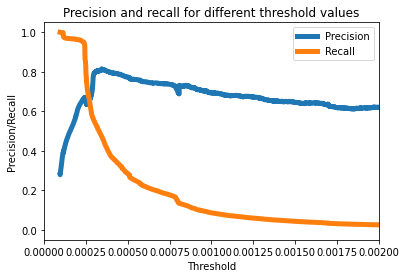

In [98]:
error_df = pd.DataFrame({'Reconstruction_error': np.mean(mse,axis=1),
                        'True_class': label})

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.xlim(0, 0.002)
plt.show()

In [108]:
z_scores = np.mean(mse,axis=1) 
outliers = z_scores > 0.00024
outliers
print('The number of malicous accounts is: '+str(label.count(1))+
      ' The number of normal accounts: '+str(label.count(0)))

from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

cm = confusion_matrix(label, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()
pre=tp/(fp+tp)
re=tp/(fn+tp)
print(f"""The classifications using the MAD method with threshold={0.04} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}
Accuracy: {(tp+tn)/(fn+tn+fp+tp):.2%} 
F1 Score: {2*((pre*re)/(pre+re))}""")

The number of malicous accounts is: 14901 The number of normal accounts: 579645
The classifications using the MAD method with threshold=0.04 are as follows:
[[572648   6997]
 [   802  14099]]

% of transactions labeled as fraud that were correct (precision): 14099/(6997+14099) = 66.83%
% of fraudulent transactions were caught succesfully (recall):    14099/(802+14099) = 94.62%
Accuracy: 98.69% 
F1 Score: 0.7833430563658084


# Model with reduced Features: 

In [84]:
col = ['adress', 'label','avg_num_of_blocks_between_intx',
 'avg_num_of_blocks_between_outtx',
 'median_num_of_blocks_between_outtx',
 'median_num_of_blocks_between_intx']
malicoususers = userdf.loc[userdf.label==1]
malicoususers = malicoususers.drop(columns=col)
normaluser = userdf.loc[userdf.label==0]
normaluser = normaluser.drop(columns=col)
numfeatures = len(normaluser.columns)
collst = malicoususers.columns
scaler = MinMaxScaler(feature_range=(0, 1))
normaluser = scaler.fit_transform(normaluser)
malicoususers = scaler.fit_transform(malicoususers)

train, valid = train_test_split(normaluser,test_size=0.5, train_size=0.5, random_state=42)
valid, tst = train_test_split(valid,test_size=0.5, train_size=0.5, random_state=42)
label = [0] * tst.shape[0]
label = label +[1] * malicoususers.shape[0]
test = np.concatenate((tst, malicoususers))
print(test.shape)

(594546, 11)


In [ ]:
#model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser10012816minfeature9Jun2021111436.h5')

In [86]:
model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser10012816minfeature25May2021160732.h5')#, compile = False

In [ ]:
#model = load_model('/Users/francaspeth/Google Drive/Masterarbeit/Share/AutoencoderModelle/DeepNN/User/AutoencoderETCUser10012832minfeature25Apr2021141531.h5')#, compile = False

In [88]:
cols = ['in_etc',
 'mean_in_etc',
 'cum_gas_used',
 'out_etc',
 'mean_gas',
 'mean_out_etc',
 'indegree',
 'outdegree',
 'numsenttx',
 'avg_gas_limit',
 'avg_gas_price']

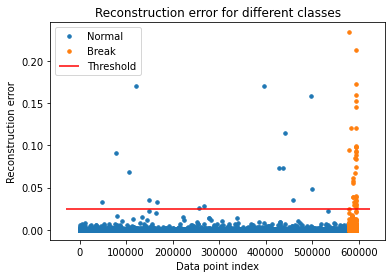

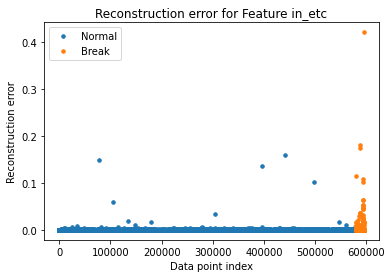

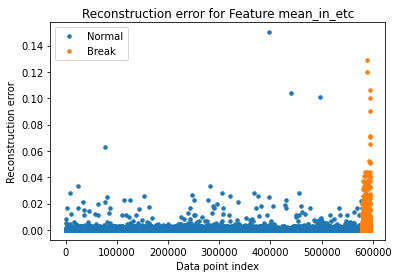

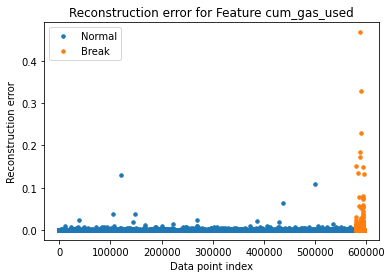

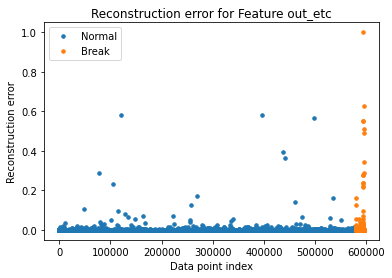

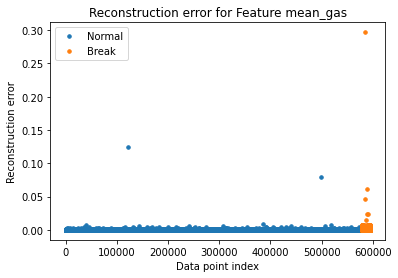

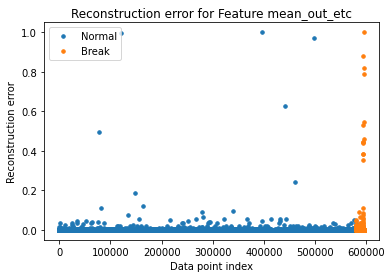

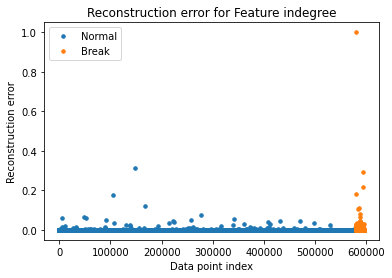

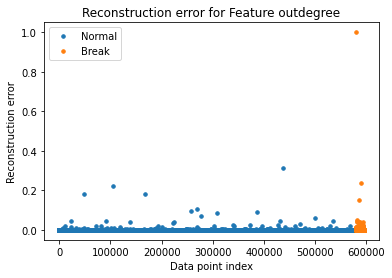

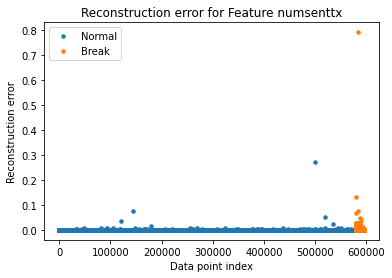

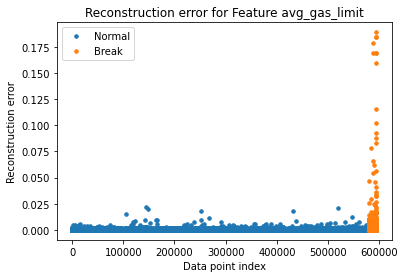

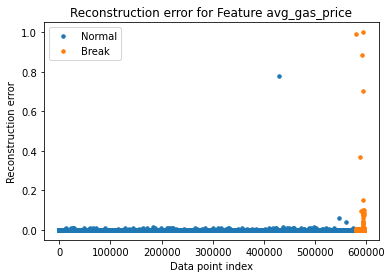

In [89]:
pred = model.predict(test)
mse = np.abs(pred-test)
Pred1 = Prediction(
    model = model,
    test = test
)

Pred1.plot_avg_reconstruction_error(np.mean(mse,axis=1),label, 0.025)
Pred1.plot_error_all_features(cols, label, mse)

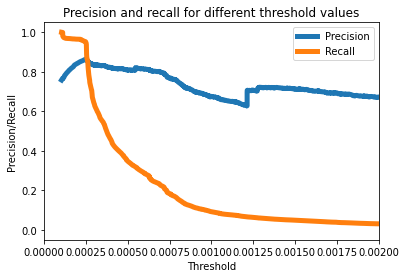

In [90]:
error_df = pd.DataFrame({'Reconstruction_error': np.mean(mse,axis=1),
                        'True_class': label})

precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.xlim(0, 0.002)
plt.show()

In [91]:
z_scores = np.mean(mse,axis=1) 
outliers = z_scores > 0.00024
outliers
print('The number of malicous accounts is: '+str(label.count(1))+
      ' The number of normal accounts: '+str(label.count(0)))

from sklearn.metrics import (confusion_matrix, 
                             precision_recall_curve)

cm = confusion_matrix(label, outliers)

# true/false positives/negatives
(tn, fp, 
 fn, tp) = cm.flatten()
pre=tp/(fp+tp)
re=tp/(fn+tp)
print(f"""The classifications using the MAD method with threshold={0.04} are as follows:
{cm}

% of transactions labeled as fraud that were correct (precision): {tp}/({fp}+{tp}) = {tp/(fp+tp):.2%}
% of fraudulent transactions were caught succesfully (recall):    {tp}/({fn}+{tp}) = {tp/(fn+tp):.2%}
Accuracy: {(tp+tn)/(fn+tn+fp+tp):.2%} 
F1 Score: {2*((pre*re)/(pre+re))}""")

The number of malicous accounts is: 14901 The number of normal accounts: 579645
The classifications using the MAD method with threshold=0.04 are as follows:
[[577334   2311]
 [   675  14226]]

% of transactions labeled as fraud that were correct (precision): 14226/(2311+14226) = 86.03%
% of fraudulent transactions were caught succesfully (recall):    14226/(675+14226) = 95.47%
Accuracy: 99.50% 
F1 Score: 0.905019403269928
